In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def load(path):
    img=cv.imread(path)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    return img

In [15]:
def display(img1,img2):
    fig=plt.figure(figsize=(12,18))
    ax=fig.add_subplot(221)
    ax.imshow(img1)
    ax=fig.add_subplot(222)
    ax.imshow(img2)
    plt.show()

In [16]:
#loading file paths
p=[]
dir=r"/Users/mehradhq/Downloads/drive-download-20220511T112708Z-001"
for i in os.listdir(dir):
    p.append(i)
#print (p)

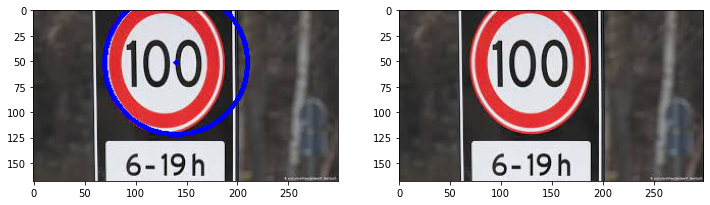

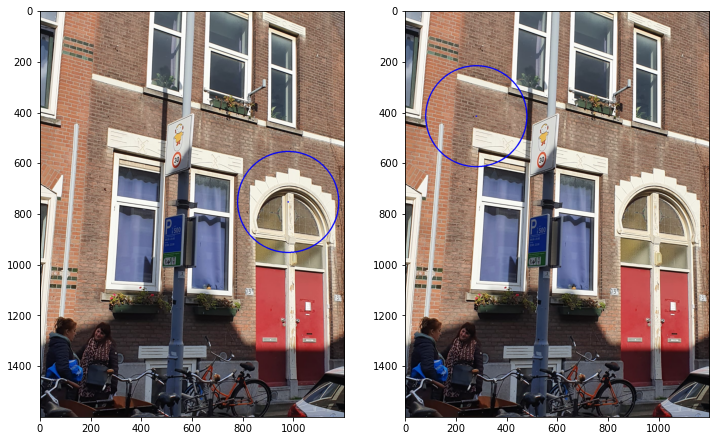

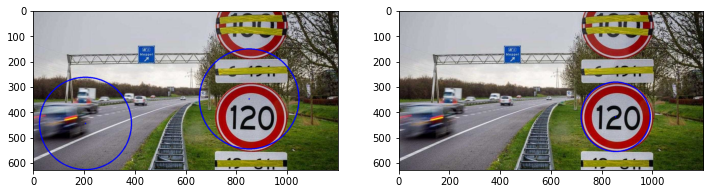

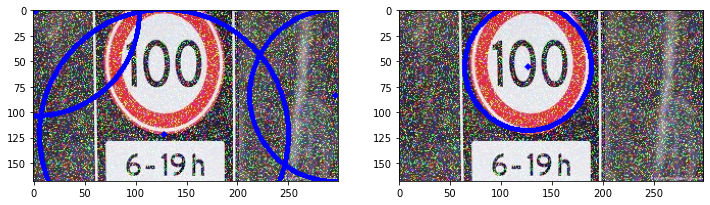

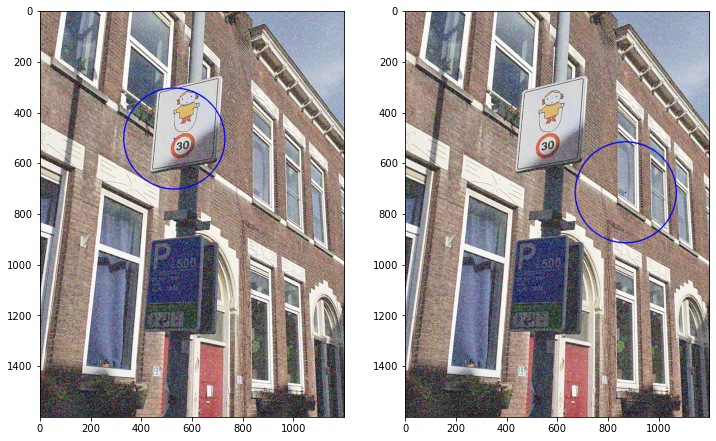

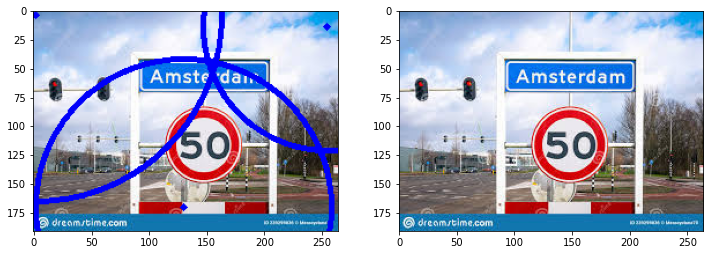

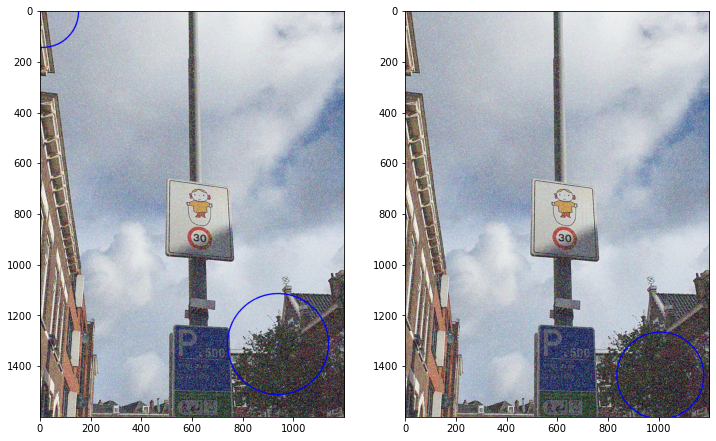

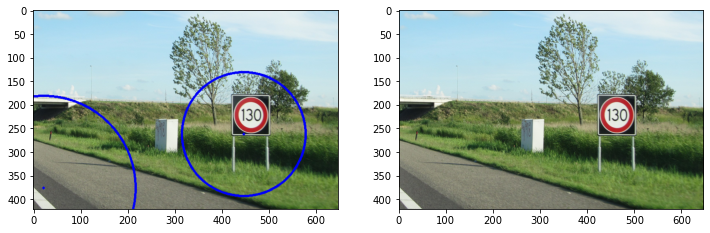

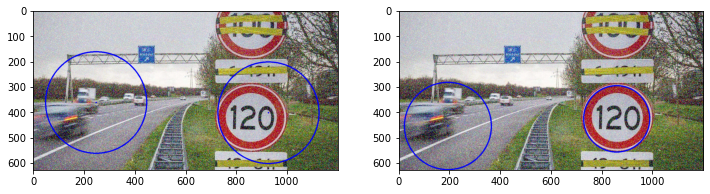

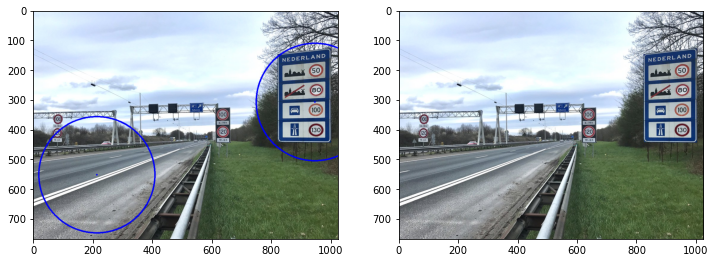

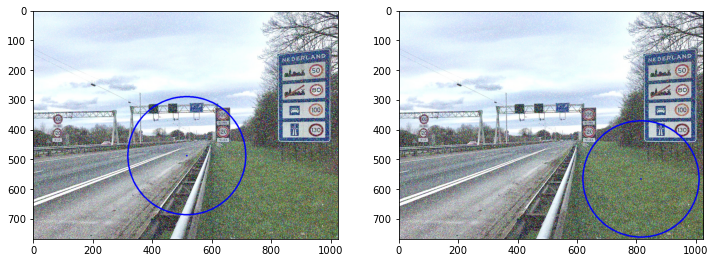

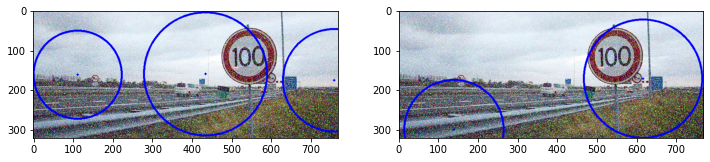

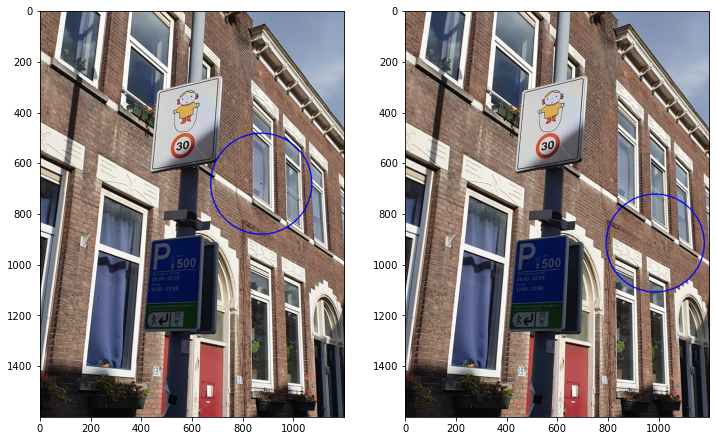

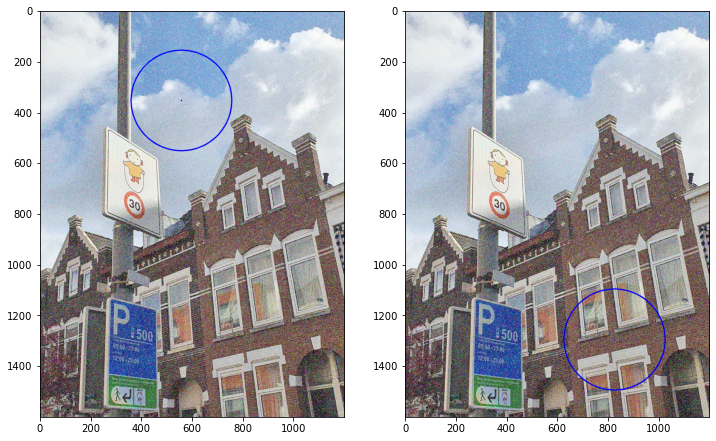

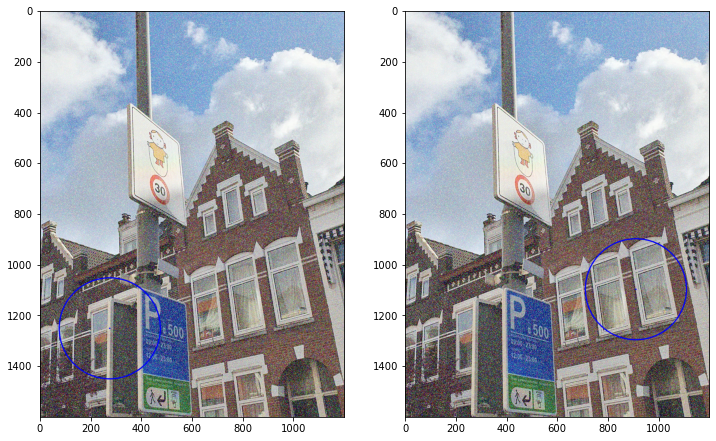

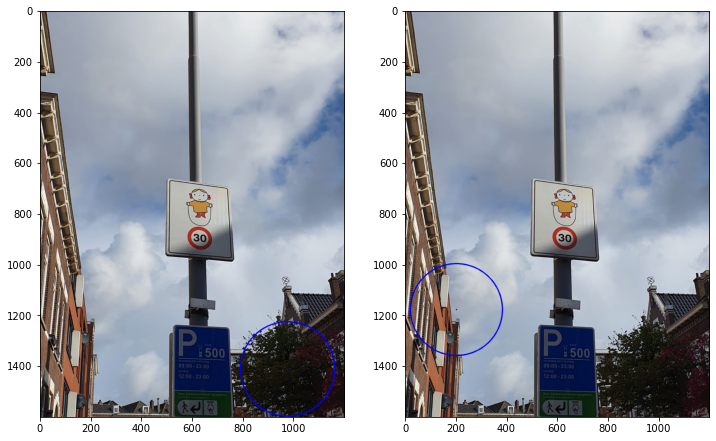

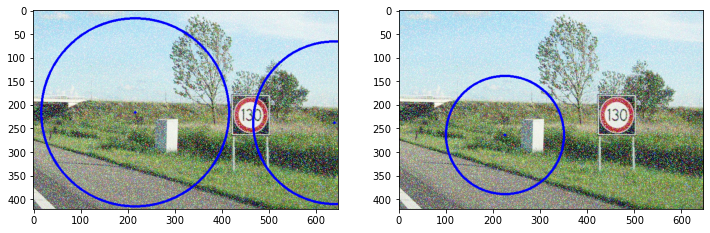

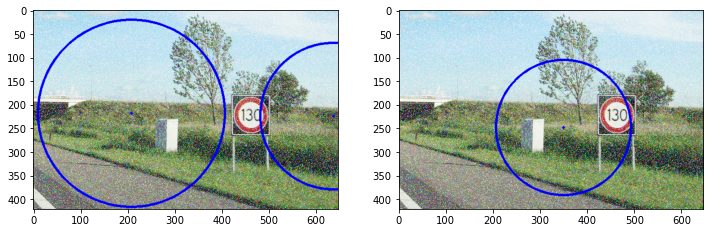

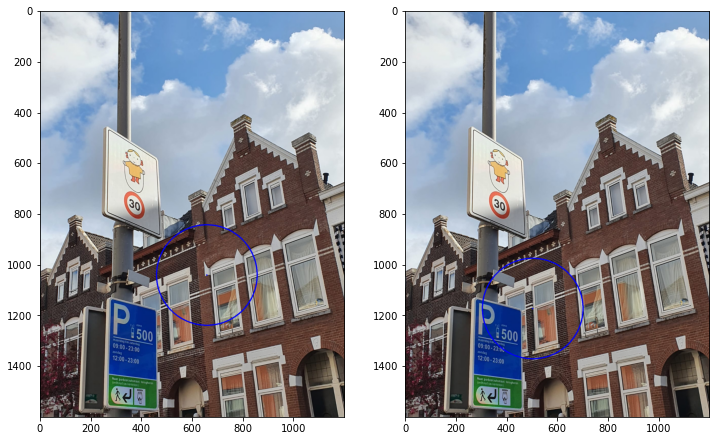

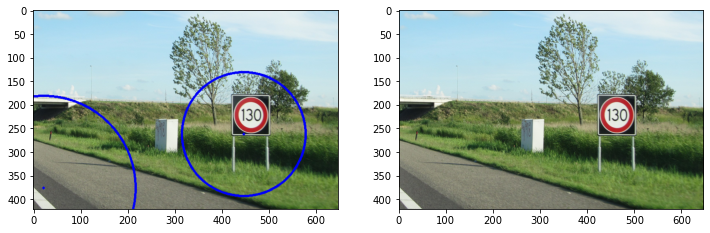

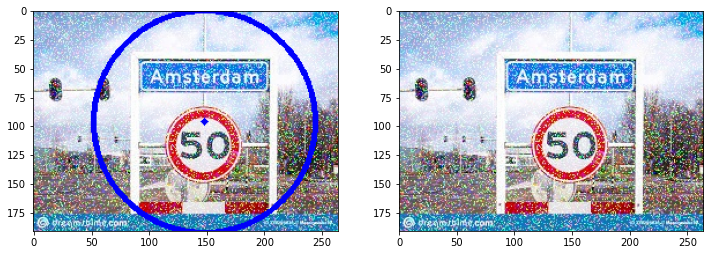

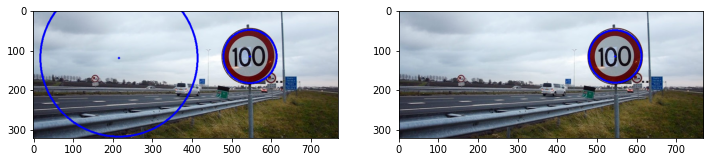

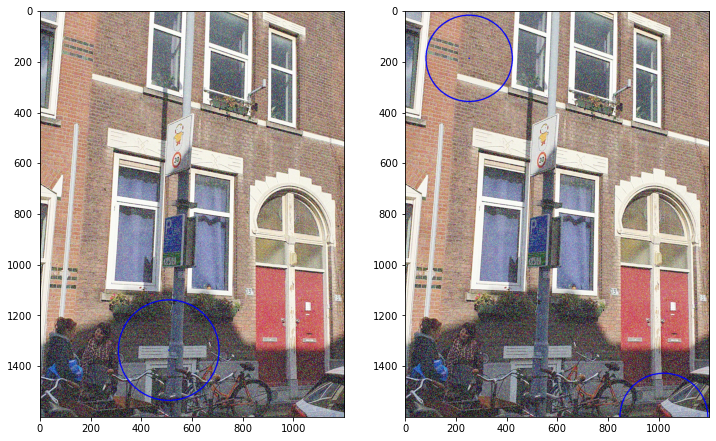

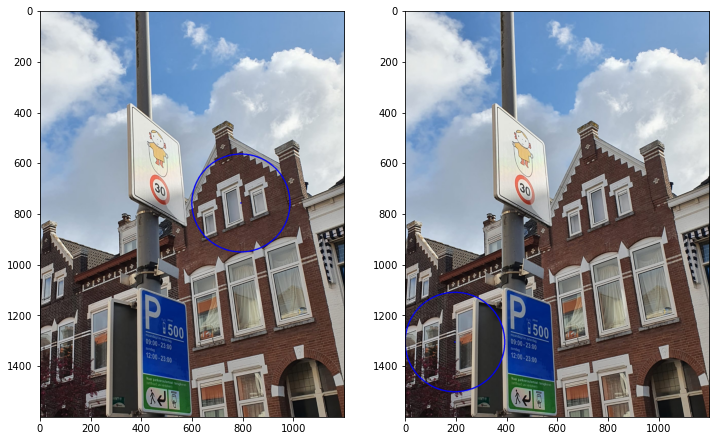

In [17]:
for i in p:
    
    #getting the path of the folder of the image
    path=os.path.join(dir, i)
    #getting the image array in RGB as defined in the load function
    img=load(path)
    
    #creating two copies of the image
    img_copy1=img.copy()
    img_copy2=img.copy()
    
    #grayscaling image  
    img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    
    #getting the hsv version of the image
    img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

    #lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv.inRange(img_hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    # set my output img to zero everywhere except my mask, set to 255 wherever my mask exists.
    masked_img = img.copy()
    masked_img[np.where(mask==0)] = [0,0,0]
    masked_img[np.where(mask!=0)] = [255,0,0]
    blended=cv.addWeighted(masked_img,0.9,img,0.3,0)
    
    #define rows
    rows=img.shape[0]
    
    #hough transform on img_gray
    circles = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, 1, rows, param1=60, param2=30, minRadius=60, maxRadius=200)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        circles.sort
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(img_copy1, center, 1, (0, 0, 250), 3)
            # circle outline
            radius = i[2]
            cv.circle(img_copy1, center, radius, (0, 0, 250), 3)
    masked_img_gray=cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)        
    #hough transform on masked_img
    circles = cv.HoughCircles(masked_img_gray, cv.HOUGH_GRADIENT, 1, rows, param1=60, param2=30, minRadius=60, maxRadius=200)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(img_copy2, center, 1, (0, 0, 250), 3)
            # circle outline
            radius = i[2]
            cv.circle(img_copy2, center, radius, (0, 0, 250), 3) 


    display(img_copy1,img_copy2)